---

#  Trend Line Extrapolation

---

---

## Calculating a Trend Line

- A trend line is a **straight line** that indicates the general direction of a time-series, or part of a time-series.<br><br>
- Recall the formula for a straight line is **`y = mx + b`**, where
  - **`y`** is the value of the line at point **`x`**
  - **`m`** is the **slope** of the the line, and
  - **`b`** is the **y-intercept**, that is the value of the line where **`x = 0`**<br><br>
- To calculate the values making up a trend line, we first determine the ***slope*** and the ***y-intercept***.<br>*Then* we can use `y = mx + b` to calculate the value of the trend line at all relevant datetimes along the x-axis.<br><br>
- There are two common ways to determine a trend line equation:
  1. Specify **two points**, that is, a **two x,y pairs** (for example, two dates and two prices), and use those two points to calculate the slope and y-intercept of a line passing through them.
  2. Perform a "linear least-squares fit" of a portion of the data, which provides an *average* slope and y-intercept for a *group* of data points (not just two).<br><br>

---

### Below we discuss the first method: specifying two data points through which to draw and trend line.  
(Afterwards we show how the second method can be done with just a couple of lines of python numpy code).

---


### Determining the Slope and Y-Intercept for Time Series Data

There are two subtleties involved in determing the **slope** and **y-intercept** for ***time series data***.

Before we discuss these subtleties, recall how to calculate the slope and intercept for ***non***-time series data:

For ***non***-time series data, given two simple floating-point x,y pairs, for example `(x1=4, y1=5)` and `(x2=8, y2=15)`, <br>we calculate the slope and y-intercept as follows:

```python
slope = dy/dx = (y2-y1)/(x2-x1)
# thus:
slope = 10. / 4.
slope = 2.5

# now use either x,y pair, along with slope, to calculate y-intercept:
y = mx + b
# therefore:
b = y - mx

# or:
yintercept = y - slope*x

# using x1,y1:
yintercept = 5.0 - 2.5*4.0
yintercept = - 5.0
```

- Thus, the formula for a straight line passing through points `(x1=4, y1=5)` and `(x2=8, y2=15)` <br>is: **`y = 2.5x - 5.0`**


### The two subtleties when using time series are:
**1. The Slope numerator and denominator are different types:** The numerator is a float, whereas the denominator is typically the difference between two dates, datetimes, or timestamp objects.

**2. Common practice in the financial industry is to *ignore* NON-trading days:** This means that some days, or times, are missing, resulting in a time-axis that is ***not*** continuous (and therefore also *not* linear with respect to time).

#### We address each of these two subtleties separately below:


## Slope of Time Series Data
Calculating the slope of time series data involves taking the difference between two prices (a *float*), and dividing by the difference between two datetimes (a *datetime delta*).  ***We cannot divide a float by a datetime-delta*** (to obtain a single value for the slope).  There are two ways we can deal with this situation:
1. Store the slope always as two values: a price delta and a datetime delta, and write a function to do the appropriate datetime manipulation every time we have to calculate a new value for the trend line at a particular datetime.
2. Convert and represent the datetimes as floats (for example, using Unix Time, the number of seconds since Jan 01 1970 UTC, or as matplotlib dates: number of days since 0001-01-01 UTC plus 1.0).

The second approach (converting datetimes to **float** representation) is much easier, because we don't have to call various datetime manipulations every time we want to calculate a new value on the trend line, but we can instead simply use float arithmetic.  We will implement the second approach using **matplotlib dates**:
- String representations of datetimes can be converted to pandas Timestamp objects using the **`pandas.Timestamp()`** constuctor.
- Pandas Timestamp types can be converted to python datetime objects by calling **`pandas.Timestamp.to_pydatetime()`**
- Python datetime types can be convert to matplotlib dates by calling **`matplotlib.dates.date2num()`**

## Handling Non-Trading Periods
In the early days of financial time series charting, the time axis would typically include ***all*** days on the calendar.As a result gaps appear on the time series chart on non-trading days (weekends and holidays) as shown on the **left**.

However, in more recent years, it is becoming increasingly common to ignore non-trading days, as show on the **right**:

| SHOW NON-TRADING DAYS | | IGNORE NON-TRADING DAYS |
| :--- | --- | :--- |
| 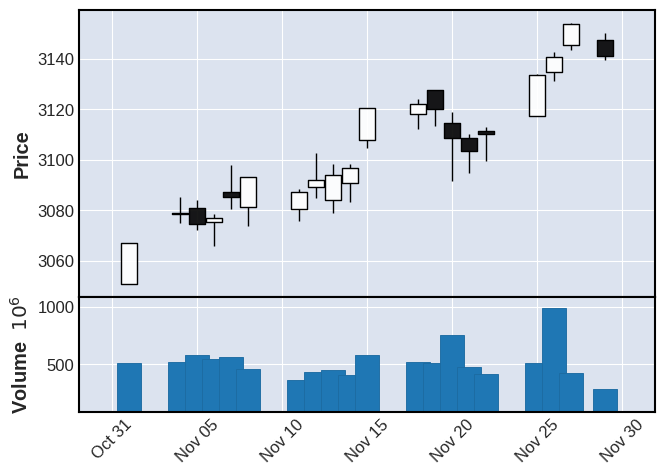 | | 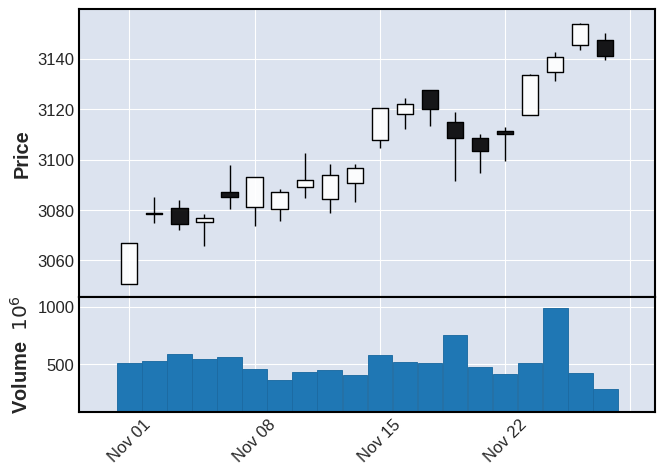 |
| <br><br>**Showing non-trading days makes the distance between any two candles *exactly proportional to the time difference* (number of days) *between those two candles***.<br><br>The **x-axis is *continuous and linear* with respect to time**.<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.<br><br> | | <br><br>**Ignoring non-trading days causes the distance from one candle to the next to be the same throughout the plot, *but the amount of time between any two adjacent candles VARIES depending upon whether a weekend, holiday, or both, exist between those two candles***.<br><br>The **x-axis** is ***not continuous*** and ***not linear*** with respect to time.<br><br>|

<br> 

### It is important to understand how the differences in these plots affect trend lines:
The main difference is that the plot on the *left* ***is linear and continuous with time***, whereas the plot on the **right** 
is ***NOT continuous nor linear with time***.  
The non-continuous, non-linear nature of the plot on the right has ***two*** affects on trend lines:
1. When calculating ***slope*** we *cannot use **time** in the denominator* of the slope, since the plot is not continuous with respect to time.<br>*However, the plot **is** continuous and linear with respect to the row number of the data in the DataFrame*, so we *can use* the row number in the denominator when calculating slope.
2. By removing non-trading days from the plot, candles that would otherwise be further apart are pressed closer together.<br>  **This can cause the exact same trend line to pass through different candles at a different angle.  This is illustrated below**:

***In BOTH charts below, the trend line was calculated as a straight line passing from the Close price on Nov 11 to the Close price on Nov 14***.  

Notice that, in both charts, ***the trend line passes identically through the four candles over which it was defined, that is, Nov 11 through Nov 14***.  

However once the extrapolated trend line passes any *non-trading* days (for example Nov 16 and Nov 17), then the relationship between the trend line and the candles ***differs*** between the two plots.   In fact, after each non-trading day, the relationship between the trend line and the candles becomes more and more different between the two plots.  This is due to the time-discontinuous nature of the plot on the right.  

***But which plot is correct?***  The answer is, it probably does not matter.  I have not seen any specific research on the matter, but based simply on the successful use of trend lines with ***both*** approaches, it appears to me that ***consistency*** is the key:  As long as you always use one or the other (show non-trading, vs don't show non-trading) for all of your trend analysis, then it will probably work.<br><br>


| SHOW NON-TRADING DAYS | | IGNORE NON-TRADING DAYS |
| :--- | --- | :--- |
| 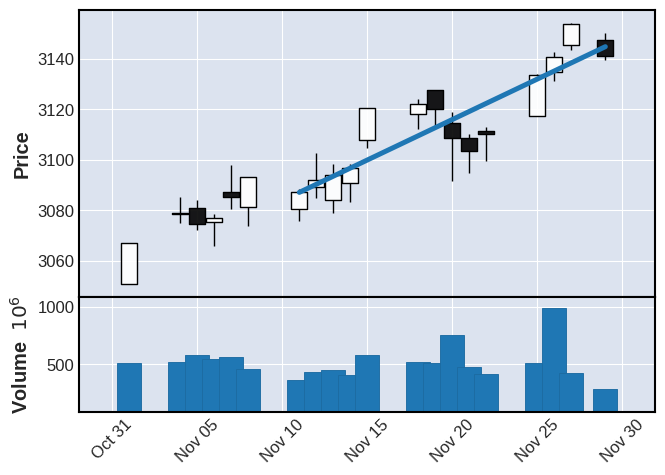 | | 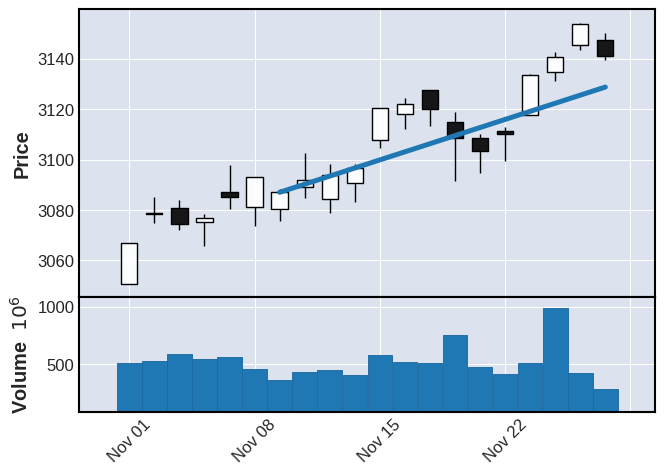 |



---

#### Based on the above discussion, here is a function to generate a trend line given two dates and some time-series data:

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas     as pd
import mplfinance as mpf
import matplotlib.dates as mdates
import datetime   as datetime
import numpy      as np

In [3]:
def date_to_mdate(date):
    """Convert a `date` to a matplotlib date:
    
    Input: `date` may be any of:
        (1) parseble string containing a date or datetime as a string,
        (2) python `datetime.date` or `datetime.datetime`,object
        (3) pandas.Timestamp object
    
    Returns a Matplotlib Date: floating point number of days from 01-Jan-0001, plus one day.
    """
    if isinstance(date,str):
        pydt = pd.to_datetime(date).to_pydatetime()
    elif isinstance(date,pd.Timestamp):
        pydt = date.to_pydatetime()
    elif isinstance(date,(datetime.datetime,datetime.date)):
        pydt = date
    else:
        return None
    return mdates.date2num(pydt)

In [4]:
def generate_trend_line(series,date1,date2,price1=None,price2=None,show_nontrading=False,forward_only=False):
    """Return a trend line given two dates and a time-series.
       Input: Pandas series with a pandas.DatetimeIndex, and two dates:
              The two dates are used to determine two "prices" from the series, 
              or the prices may optionally be specified as `price1` and `price1`.
              `show_nontrading` optionally indicates that time-axis is continuous with respect to time
              `forward_only` optionally indicates whether to extrapolate both backwards and forwards, or forward only.
            
       Output: Trend line as 
    """
    if not isinstance(series,pd.Series):
        raise TypeError('First argument must be a Pandas.Series')
    index = series.index
    if not isinstance(index,pd.DatetimeIndex):
        raise TypeError('First argument, pandas.Series, MUST HAVE A Pandas.DatetimeIndex')
        
    p1 = series[date1] if price1 is None else price1
    p2 = series[date2] if price2 is None else price2

    if show_nontrading:
        d1 = date_to_mdate(date1)
        d2 = date_to_mdate(date2)
    else:
        d1 = float(index.get_loc(date1))
        d2 = float(index.get_loc(date2))
        
    slope = (p2-p1)/(d2-d1)
    yintercept = ((p1 - slope*d1) + (p2 - slope*d2)) / 2.0

    if show_nontrading:
        dates = mdates.date2num(index.tz_localize(None).to_pydatetime())
    else:
        dates = range(0,len(index))
        
    trend_line = []
    for dt in dates:
        trend_line.append(slope*dt + yintercept)
    if forward_only:
        ixd1 = index.get_loc(date1)
        for jj in range(0,ixd1):
            trend_line[jj] = np.nan

    return pd.Series(trend_line,index=index)

In [5]:
# Read in daily data for the S&P 500 from November of 2019: 
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [6]:
kwargs = dict(type='candlestick',volume=True,figscale=0.7)

---
#### Plots without trend lines:

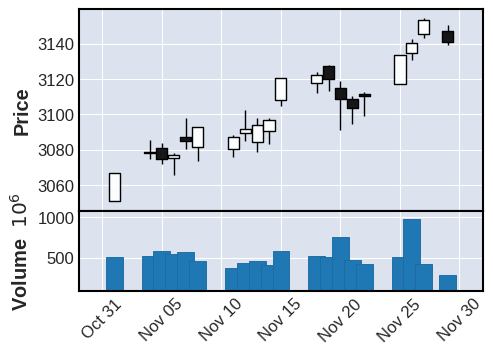

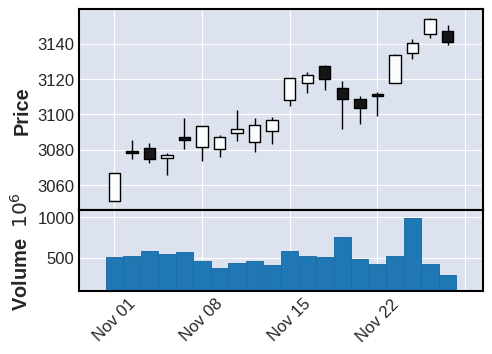

In [7]:
mpf.plot(daily,**kwargs,show_nontrading=True)
mpf.plot(daily,**kwargs)

---
#### Plots *with* trend lines:

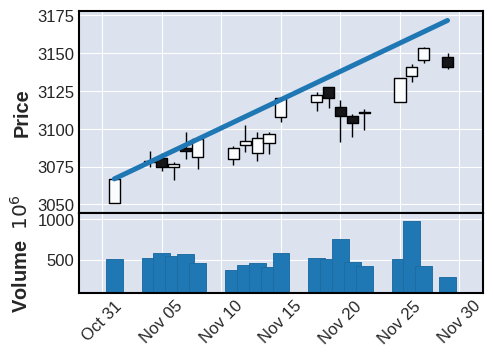

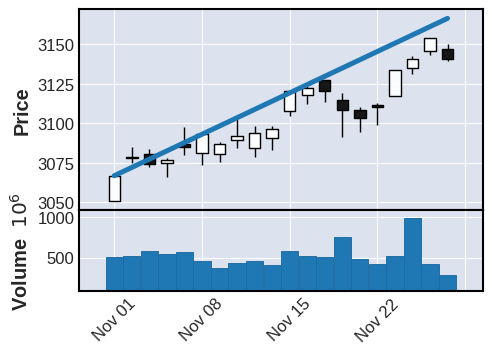

In [8]:
a = mpf.make_addplot( generate_trend_line(daily['Close'],'11/1/2019','11/8/2019',show_nontrading=True) )
_ = mpf.plot(daily,**kwargs,addplot=a,show_nontrading=True)

a = mpf.make_addplot( generate_trend_line(daily['Close'],'11/1/2019','11/8/2019') )
_ = mpf.plot(daily,**kwargs,addplot=a)

---
#### Another trend line example:

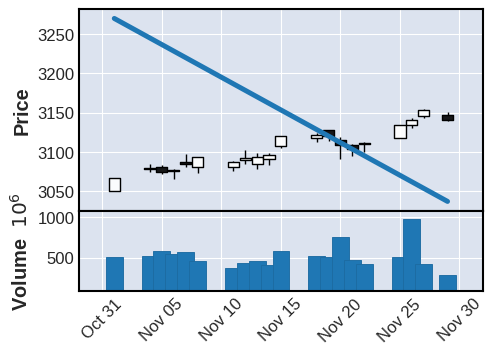

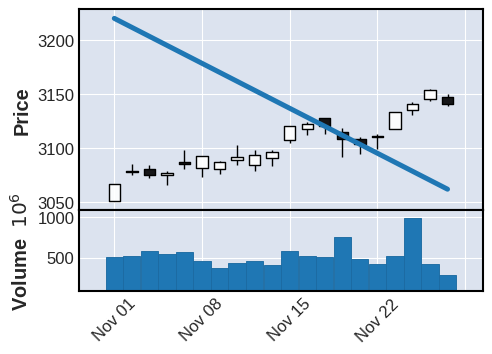

In [9]:
a = mpf.make_addplot(generate_trend_line(daily['Close'],'11/19/2019','11/21/2019',show_nontrading=True))
_ = mpf.plot(daily,**kwargs,addplot=a,show_nontrading=True)

a = mpf.make_addplot(generate_trend_line(daily['Close'],'11/19/2019','11/21/2019'))
_ = mpf.plot(daily,**kwargs,addplot=a)

---
#### trend line extrapolating *forward only*:

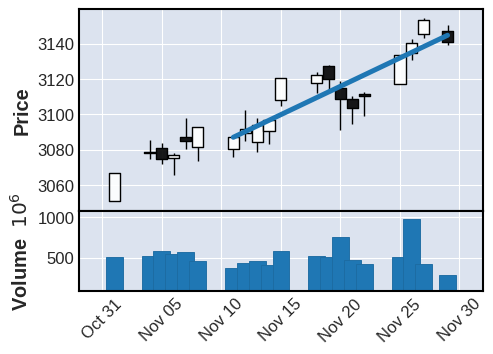

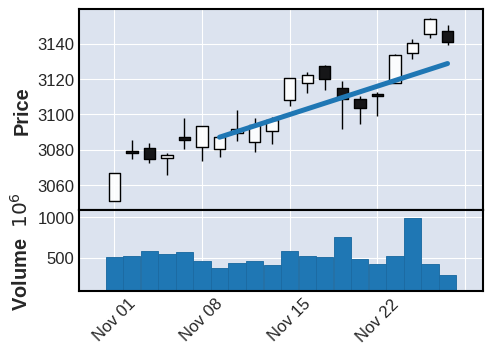

In [10]:
a = mpf.make_addplot( generate_trend_line(daily['Close'],'11/11/2019','11/14/2019',show_nontrading=True,forward_only=True) )
_ = mpf.plot(daily,**kwargs,addplot=a,show_nontrading=True)

a = mpf.make_addplot( generate_trend_line(daily['Close'],'11/11/2019','11/14/2019',forward_only=True) )
_ = mpf.plot(daily,**kwargs,addplot=a)

---
### Now we generate some *weekly* data.
### Notice that with weekly data there is no difference between `show_nontrading=True` and `show_nontrading=False`, because there are *no* non-trading weeks.

In [11]:
daily = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [12]:
weekly = daily.resample('1W').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    })

In [13]:
weekly.shape
weekly.head(2)
weekly.tail(2)

(53, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2011-07-03,132.089996,134.100006,131.779999,133.919998,202385700
2011-07-10,133.779999,135.699997,133.110001,134.399994,673832300


,Open,High,Low,Close,Volume
Date,,,,,
2012-06-24,133.580002,136.250000,132.330002,133.460007,810496700
2012-07-01,132.050003,136.270004,130.850006,136.100006,777590700


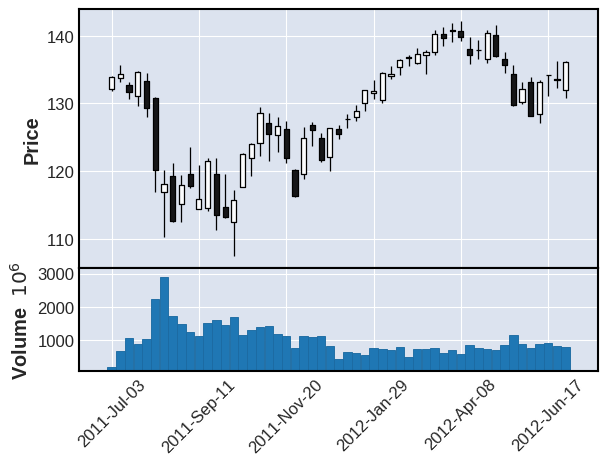

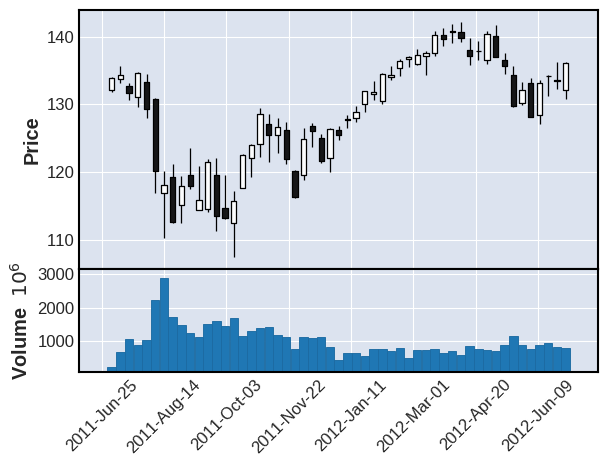

In [14]:
kwargs['figscale'] = 0.9
mpf.plot(weekly,**kwargs)
mpf.plot(weekly,**kwargs,show_nontrading=True)

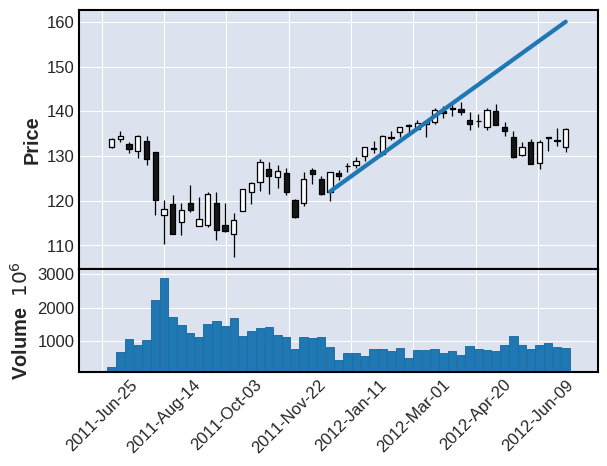

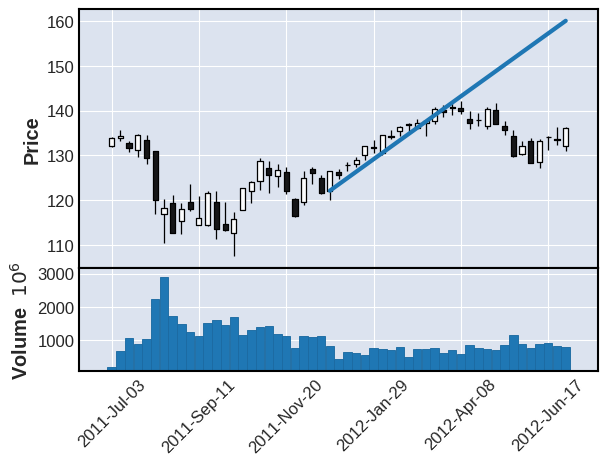

In [15]:
a = mpf.make_addplot( generate_trend_line(weekly['Open'],'12-25-2011','2-5-2012',show_nontrading=True,forward_only=True) )
_ = mpf.plot(weekly,**kwargs,show_nontrading=True,addplot=a)

a = mpf.make_addplot( generate_trend_line(weekly['Open'],'12-25-2011','2-5-2012',forward_only=True))
_ = mpf.plot(weekly,**kwargs,addplot=a)